# Loading In and Preprocessing the Data

**Importing Libraries**

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Loading In Data (Using the UCI Machine Learning Repository to Load in Data)**

In [325]:
ratings = fetch_ucirepo(id=485) 
  

data = pd.DataFrame(ratings.data.features)#Wont include userid of reviewer which isn't needed for this project

display(data.head())
display(data.tail())
data.shape

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12
5455,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,0.96,...,0.85,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17


(5456, 24)

**Looking at Data Frame Information**

In [326]:
data.dtypes

churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoos                     float64
restaurants              float64
pubs/bars                float64
local services            object
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64
view points              float64
monuments                float64
gardens                  float64
dtype: object

All values in the dataset should be floating point numbers between 0 and 5, local services is categroized as a object datatype which it could have string values, so for the clustering algorithms to work we need to convert the values into float number values.

In [327]:
#data['local services'] = data['local services'].astype(float)

#Cant use astype method to convert the local services column into float values because it raises a value error, it appears there are string values in this column

#To get around this conversion error I'm going to use the pd.to_numeric method to replace any non-number values with an NaN value
data['local services'] = pd.to_numeric(data['local services'], errors='coerce')

**Checking For Missing/NaN values in Dataset**

In [328]:
print('Amount of Missing Values For Each Feature')
data.isnull().sum() #Appears to be some missing/NaN values so we should get rid of those rows since the dataset is pretty big anyways

Amount of Missing Values For Each Feature


churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [329]:
data = data.dropna() #Removing any rows with a missing or NaN value
data.shape #Two rows appear to be dropped

(5454, 24)

**Looking At The Average Ratings For Each Attraction and The Distribution of Ratings**

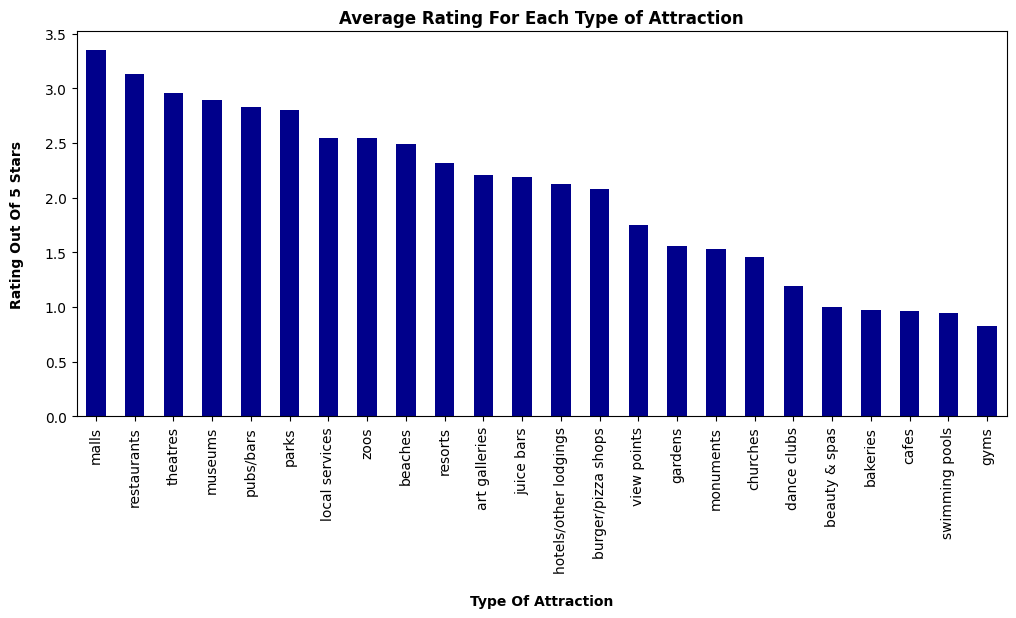

In [330]:
#Creating data frame of all feature averages
avg = data.mean().sort_values(ascending=False)
avg = pd.DataFrame(avg)

#Plotting averages in descending order
plot = avg.plot(kind='bar', figsize= (12,5), legend= False, color='darkblue')
plot.set_title('Average Rating For Each Type of Attraction',fontdict={'fontweight':'bold'})
plot.set_xlabel("Type Of Attraction",fontdict={'fontweight':'bold'}, labelpad=15)
plot.set_ylabel("Rating Out Of 5 Stars",fontdict={'fontweight':'bold'}, labelpad= 15)

plt.show()


**Distribution Of Ratings for Each Attraction**

C:\Users\jlawr\AppData\Local\Temp\ipykernel_19284\4082214200.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  boxplot.set_xticklabels(labels=data.columns,rotation = 90)


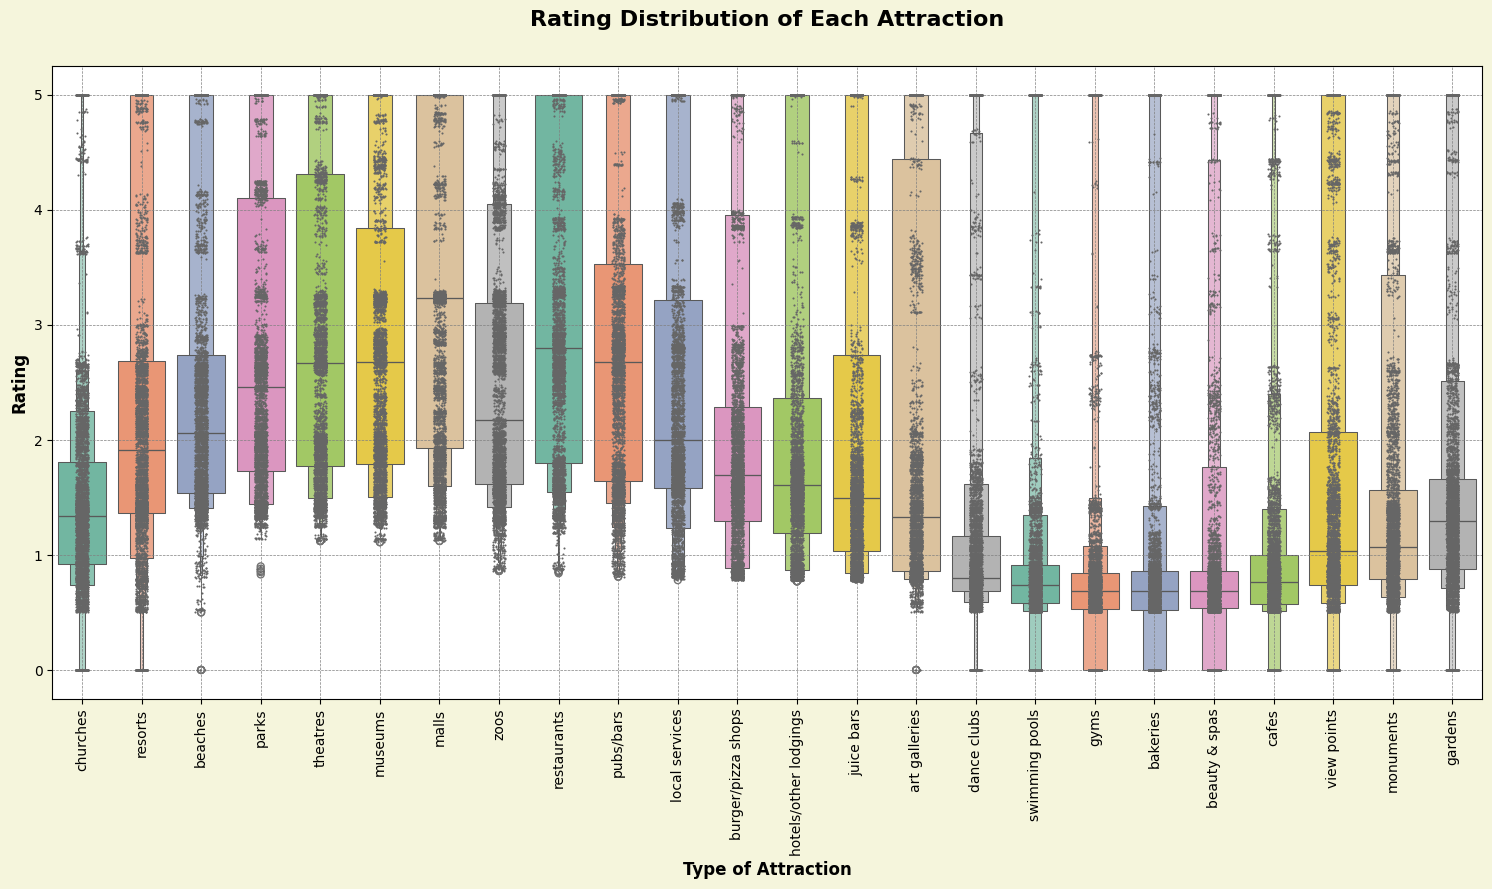

In [331]:
df_melt = pd.melt(data, value_vars=data.columns, var_name = 'feature', value_name='rating')#Creating data frame where each rating is in a row by itself for the box plot

#Creating boxplot
fig = plt.figure(figsize=(15,9), facecolor='#f5f5dc')
boxplot = sns.boxenplot(df_melt, x='feature', y='rating',hue = 'feature',palette='Set2')
sns.stripplot(df_melt, x = 'feature', y = 'rating', size = 1.5, color='.4')


plt.grid(color='gray', linestyle='--', linewidth=0.5)
boxplot.set_xticklabels(labels=data.columns,rotation = 90)
plt.xlabel("Type of Attraction", fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('Rating', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title('Rating Distribution of Each Attraction', fontdict={'fontweight':'bold', 'fontsize': 16}, y=1.05)
fig.tight_layout(pad=1)

plt.show()

**Looking at Possible Correlations Between Attractions**

<AxesSubplot: >

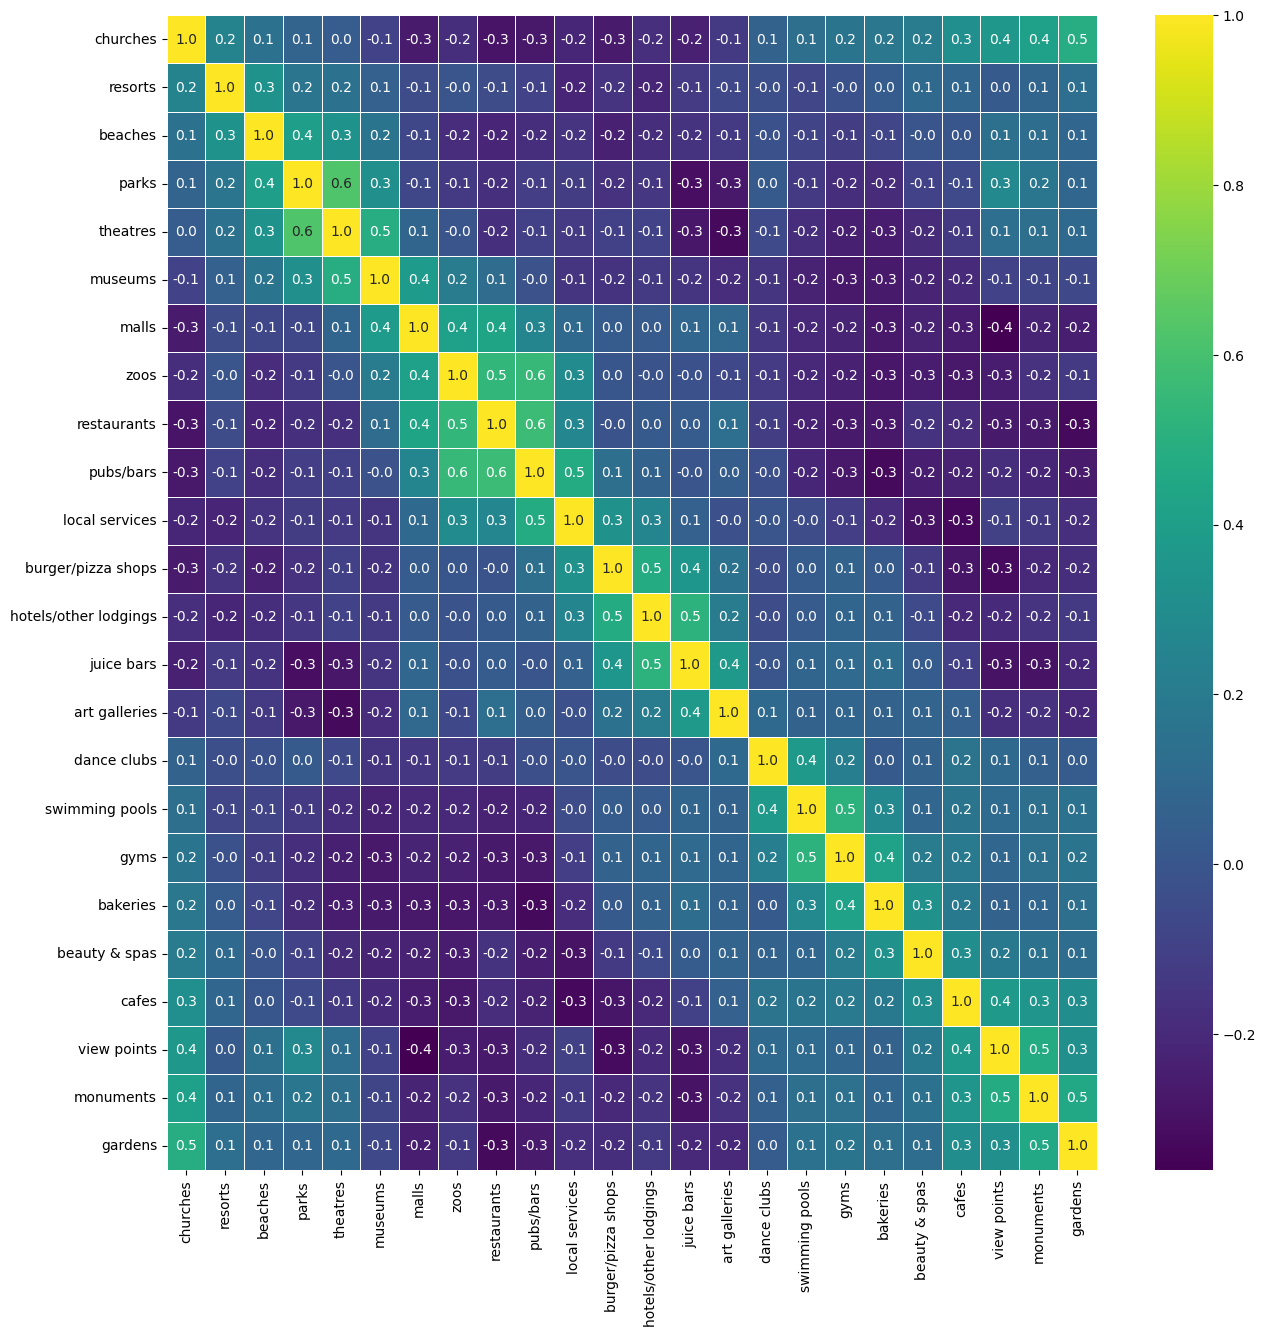

In [332]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt= '.1f', cmap = 'viridis', linewidths=.5)

# Cluster Model 1: K-Means Clustering Utilizing PCA

As shown in the boxplots for the features/attractions, they vary a lot in ratings distrbution so it is probably smart to scale and standardize the data.

**Scaling The Data**

In [333]:
#Scaling Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

With there being 24 features in this dataset, that's a lot of dimensions to work with so the clustering models might work better if we perform some dimensionality reduction. This will lead to better computational efficiency as well.

**Utilzing PCA**

In [338]:
pca = PCA(n_components=.9) #We want explain variance to be at least 90% so that means we are still retaining most of the variance and information from the dataset 

pca_data = pca.fit_transform(scaled_data)
print('Number of components to reach .9 explained variance:',pca.n_components_)
print('Explain Variance with 18 Components:', sum(pca.explained_variance_ratio_))


Number of components to reach .9 explained variance: 18
Explain Variance with 18 Components: 0.9095041692424847


18 dimensions is still pretty big and obviously we can only visualize up to 3 dimensions with 2 being the easiest to interpret. Using the Elbow method, I'm going to test whether the non-PCA data, PCA data with 2 components, or PCA data with 18 components is best to perform clustering and using the elbow method we can figure out the optimal amount of clusters. Even if the 18 component PCA data is the best we could still visualize the data and clusters on the 2 best componenets but the visualization might not capture the clusters clearly.

**Using Elbow Method To Determine Amount of Clusters Anf If PCA or Non-PCA Is Better**

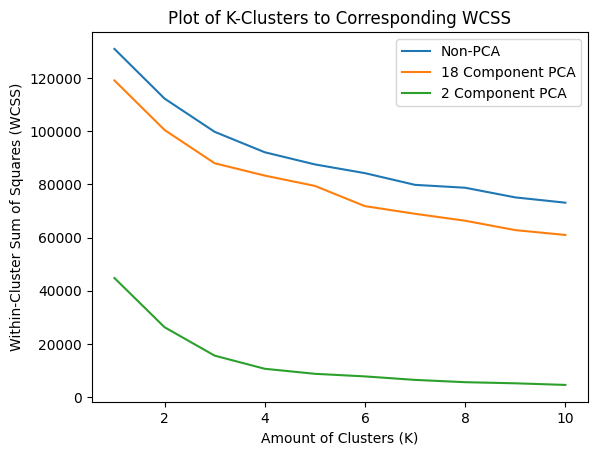

In [344]:
pca2 = PCA(n_components= 2)

pca_data2 = pca2.fit_transform(scaled_data)
#Calculating the WCSS/Inertia for different amounts of clusters
clusters = [i for i in range(1,11)]
wcss_nonpca = []
wcss_pca18 = []
wcss_pca2 = []
for i in clusters:
    kmeans = KMeans(n_clusters=i,random_state=100)#Added random state for reproducability
    kmeans.fit(scaled_data)#Fitting Kmeans model to non pca data
    wcss_nonpca.append(kmeans.inertia_)

    kmeans.fit(pca_data)#Fitting model to pca 18 components data
    wcss_pca18.append(kmeans.inertia_)

    kmeans.fit(pca_data2)#Fitting model to pca 2 components data
    wcss_pca2.append(kmeans.inertia_)

plt.plot(clusters,wcss_nonpca)
plt.plot(clusters,wcss_pca18)
plt.plot(clusters,wcss_pca2)
plt.legend(['Non-PCA','18 Component PCA', '2 Component PCA'])
plt.title('Plot of K-Clusters to Corresponding WCSS')
plt.xlabel('Amount of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**Visualizing Clusters**

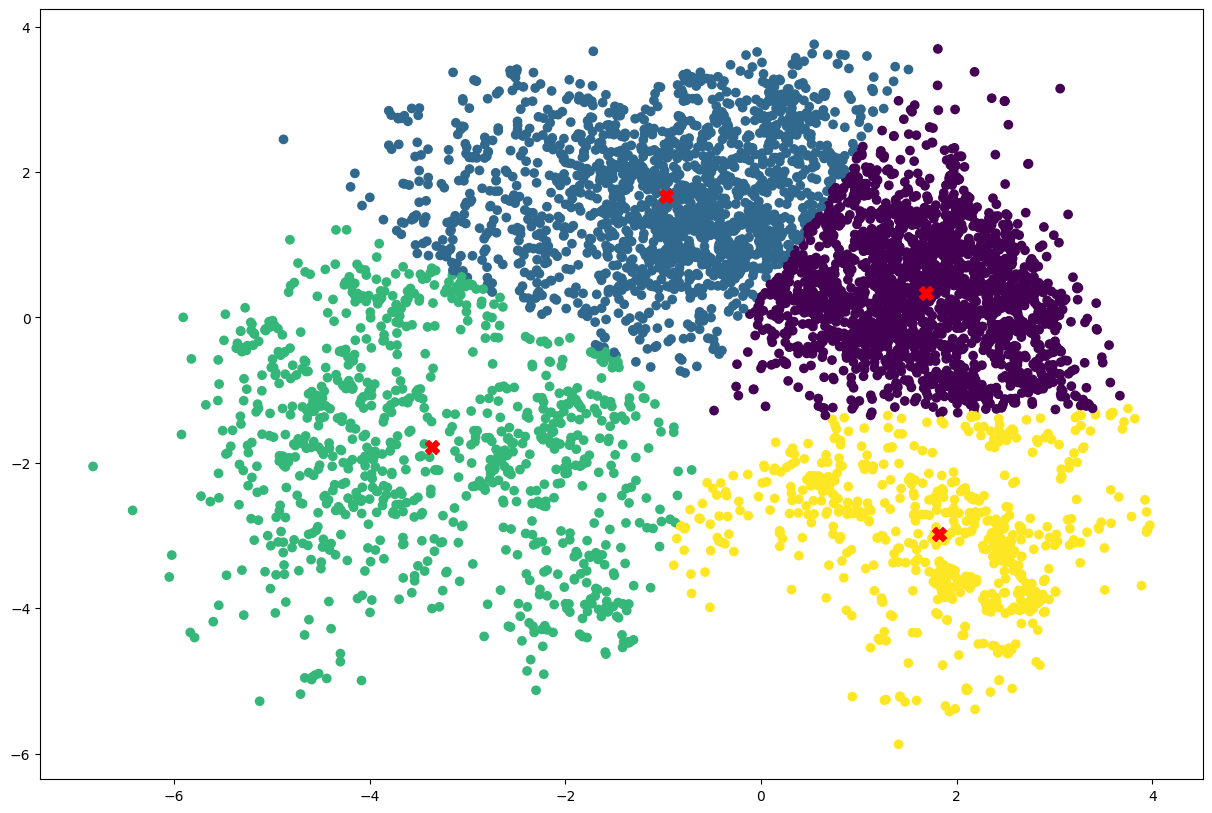

In [371]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_data2)

cluster_labels = kmeans.labels_ #Storing cluster assignments

#Creating Scatterplot
plt.figure(figsize=(15,10))
plt.scatter(pca_data2[:,0],pca_data2[:,1],c = cluster_labels, cmap='viridis')

#Adding cluster centroids
plt.scatter(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker='X', s=100, c = 'red')